In [26]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the data
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/lungs cancer inmol/Train",
    image_size=(32, 32),
    batch_size=32
)

Found 357 files belonging to 3 classes.


In [89]:
val_set = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/lungs cancer inmol/Val",
    image_size=(32, 32),
    batch_size=32
)

Found 77 files belonging to 3 classes.


In [90]:
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/lungs cancer inmol/Test",
    image_size=(32, 32),
    batch_size=32
)

Found 76 files belonging to 3 classes.


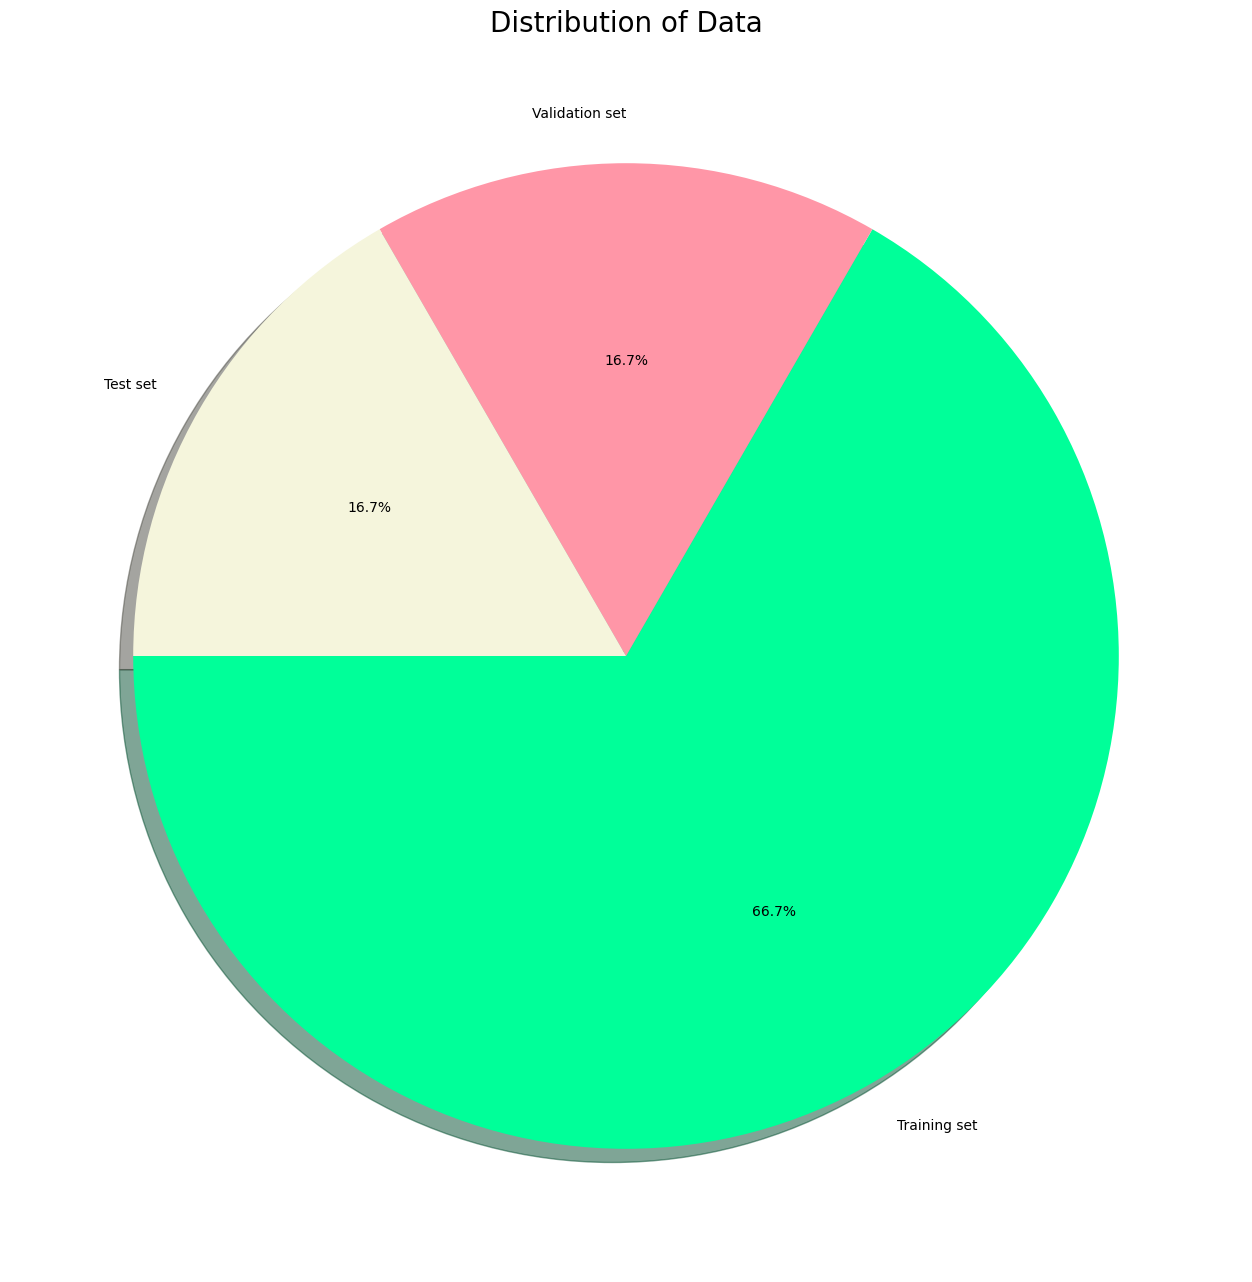

In [91]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Define class names
class_names = ['Training set', 'Validation set', 'Test set']

# Get the number of samples in each set
labels_count = [len(train_set), len(val_set), len(test_set)]

# Create the pie chart
plt.figure(figsize=(16, 16))
plt.pie(labels_count, labels=class_names, startangle=180,
        autopct='%1.1f%%', colors=['#00ff99', '#FF96A7',"beige"], shadow=True)
plt.title('Distribution of Data', fontsize=20)
plt.show()

In [92]:
class_names = ['Adenocarcinoma', 'Benign', 'Squamous_carcinoma']
print(class_names)

['Adenocarcinoma', 'Benign', 'Squamous_carcinoma']


In [93]:
for image_batch, label_batch in train_set:
    print(image_batch.shape)
    break

(32, 32, 32, 3)


In [94]:

from tensorflow.keras.applications import InceptionV3
IMAGE_SIZE = [224, 224]

!pip install tensorflow
import tensorflow as tf
inception = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [95]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [96]:
from tensorflow.keras.layers import Input, GaussianNoise

# Define the input layer
input_layer = Input(shape=(32, 32, 3))

# Add the Gaussian noise layer
noisy_input = GaussianNoise(0.1)(input_layer)

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten
model = keras.Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation="relu"),  # Add an additional Conv2D layer
    MaxPooling2D((2, 2)),  # Add an additional MaxPooling2D layer


    Flatten(),
    Dense(256, activation="relu"),
    Dense(3, activation="Softmax")
])
# Print the model summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_215 (Conv2D)         (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_216 (Conv2D)         (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_217 (Conv2D)         (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 2, 2, 128)        

In [98]:
# Compile the model
model.compile(
 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
 optimizer="adam",
 metrics=["accuracy"]
)

In [99]:
import time
start_time=time.time()
history= model.fit(
  train_set,
  validation_data=val_set,
  epochs=60,
  steps_per_epoch=len(train_set),
  validation_steps=len(val_set)
)
end_time=time.time()
elapsed_time=end_time=start_time
print(f"Elapsed time: {elapsed_time} seconds")

Epoch 1/60
12/12 [==============================] - 4s 51ms/step - loss: 16.8852 - accuracy: 0.4818 - val_loss: 1.3302 - val_accuracy: 0.6364
Epoch 2/60
12/12 [==============================] - 3s 101ms/step - loss: 0.9073 - accuracy: 0.7031 - val_loss: 0.3937 - val_accuracy: 0.8442
Epoch 3/60
12/12 [==============================] - 2s 52ms/step - loss: 0.4964 - accuracy: 0.8123 - val_loss: 0.4553 - val_accuracy: 0.7662
Epoch 4/60
12/12 [==============================] - 3s 107ms/step - loss: 0.5301 - accuracy: 0.7563 - val_loss: 0.3952 - val_accuracy: 0.8182
Epoch 5/60
12/12 [==============================] - 2s 84ms/step - loss: 0.3920 - accuracy: 0.8431 - val_loss: 0.2410 - val_accuracy: 0.9351
Epoch 6/60
12/12 [==============================] - 3s 97ms/step - loss: 0.3091 - accuracy: 0.8768 - val_loss: 0.3105 - val_accuracy: 0.8701
Epoch 7/60
12/12 [==============================] - 4s 94ms/step - loss: 0.2812 - accuracy: 0.8992 - val_loss: 0.2140 - val_accuracy: 0.9351
Epoch 8/60

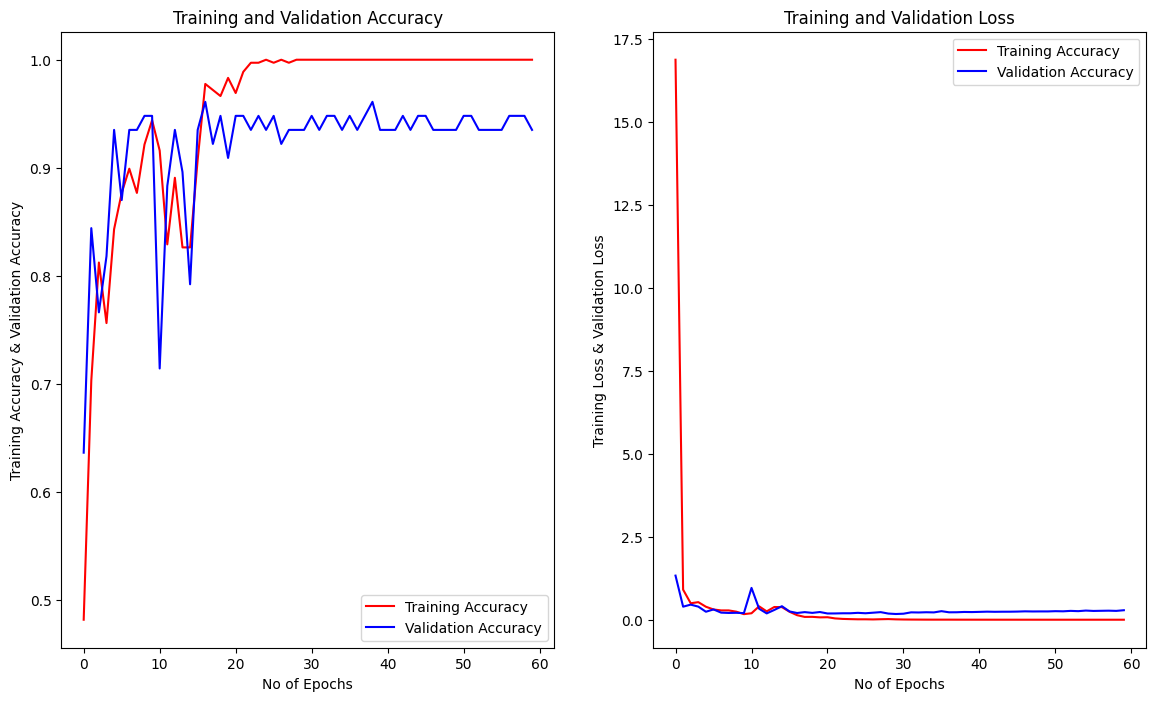

In [100]:
# Extract the metrics from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the results
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy',color='red')
plt.plot(range(len(acc)), val_acc, label='Validation Accuracy',color='blue')
plt.xlabel('No of Epochs')
plt.ylabel('Training Accuracy & Validation Accuracy')
plt.title('Visualization of Training Accuracy & Validation Accuracy Result')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Accuracy',color='red')
plt.plot(range(len(val_loss)), val_loss, label='Validation Accuracy',color='blue')
plt.xlabel('No of Epochs')
plt.ylabel('Training Loss & Validation Loss')
plt.title('Visualization of Training Loss & Validation Loss Result')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [101]:
loss,accuracy=model.evaluate(train_set)
accuracy*100

12/12 [==============================] - 2s 47ms/step - loss: 3.0776e-04 - accuracy: 1.0000


100.0

In [102]:
val_loss,val_accuracy=model.evaluate(val_set)
val_accuracy*100

3/3 [==============================] - 1s 9ms/step - loss: 0.2867 - accuracy: 0.9351


93.50649118423462

In [103]:
test_loss,test_accuracy=model.evaluate(test_set)
test_accuracy*100

3/3 [==============================] - 0s 8ms/step - loss: 0.2634 - accuracy: 0.9474


94.73684430122375

In [104]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


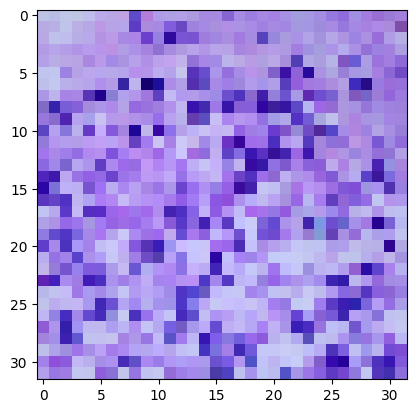

Actual label: Adenocarcinoma
1/1 [==============================] - 0s 206ms/step
Predicted label: Adenocarcinoma


In [105]:
for images_batch, labels_batch in test_set:

    first_image = images_batch[0]
    first_label = int(labels_batch[0])

    # Normalize the image data
    normalized_image = first_image / 255.0

    # Resize the first_image to the desired shape
    first_image = tf.image.resize(first_image, (224, 224))

    # Convert the first_image EagerTensor to a NumPy array
    first_image = first_image.numpy()

    # Reshape the image to the desired shape
    first_image = first_image.reshape(224, 224, 3)

    # Display the normalized image
    plt.imshow(normalized_image)
    plt.show()
    print("Actual label:", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    predicted_label = class_names[np.argmax(batch_prediction[0])]
    print("Predicted label:", predicted_label)

    break

1/1 [==============================] - 0s 45ms/step


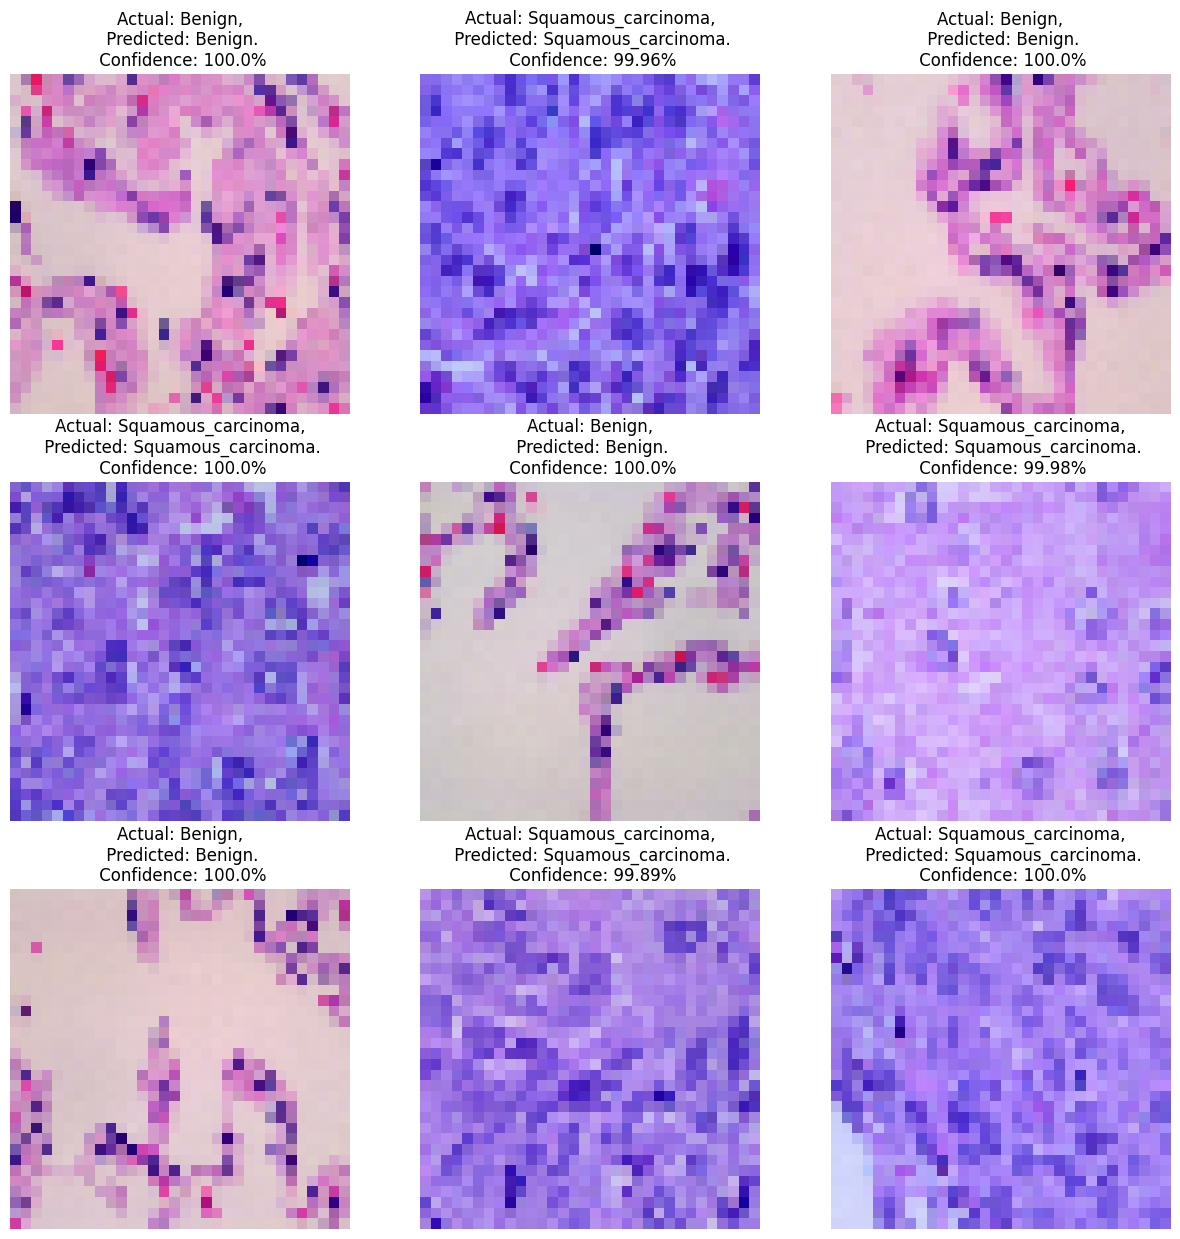

In [106]:
plt.figure(figsize=(15, 15))
for images, labels in test_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)

        # Normalize the image data
        image = images[i] / 255.0

        plt.imshow(image)

        predicted_class, confidence = predict(model, image)
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break


Generating predictions...
3/3 [==============================] - 0s 4ms/step
Classification Report:
                    precision    recall  f1-score   support

    adenocarcinoma       0.96      0.92      0.94        25
            benign       1.00      0.96      0.98        25
squamous_carcinoma       0.89      0.96      0.93        26

          accuracy                           0.95        76
         macro avg       0.95      0.95      0.95        76
      weighted avg       0.95      0.95      0.95        76

Generating confusion matrix...


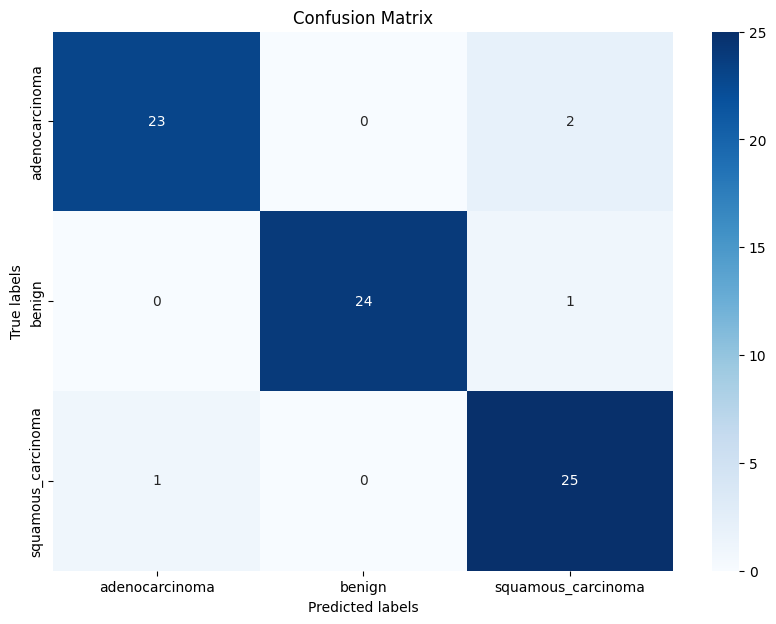

In [108]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Make predictions on a subset of the test set
subset_size = 100  # Adjust the subset size as needed
test_images_subset, test_labels_subset = [], []
for images, labels in test_set:
    if len(test_images_subset) < subset_size:
        test_images_subset.extend(images)
        test_labels_subset.extend(labels)
    else:
        break
test_images_subset = np.array(test_images_subset)
test_labels_subset = np.array(test_labels_subset)

# Generate predictions
print("Generating predictions...")
y_pred_subset = model.predict(test_images_subset)
y_pred_classes_subset = np.argmax(y_pred_subset, axis=1)

# Generate classification report
class_names = ['adenocarcinoma', 'benign', 'squamous_carcinoma']  # Replace with your class names
print("Classification Report:")
print(classification_report(test_labels_subset, y_pred_classes_subset, target_names=class_names))

# Generate confusion matrix
print("Generating confusion matrix...")
cm_subset = confusion_matrix(test_labels_subset, y_pred_classes_subset)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_subset, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()